In [ ]:
import kagglehub
import os
import pandas as pd
import shutil

# Download the dataset
path = kagglehub.dataset_download("sujay1844/used-car-prices")

# Get filename
filename = os.listdir(path)[0]
full_path = os.path.join(path, filename)

# Load DataFrame
df = pd.read_csv(full_path)

# Optionally delete the dataset folder so the code is reusable
shutil.rmtree(path)

C:\Users\user\AppData\Local\Temp\ipykernel_8984\1843325655.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


100%|████████████████████████████████████████████████████████████████████████████████| 139k/139k [00:00<00:00, 185kB/s]

Extracting files...


In [2]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


## Exploring Hyundai vehicles

### We are using hyundai vehicles because:
+ Hyundai is one of the most popular cars in India (Google)
+ Hyundai cars are a large enough population in our dataset for analysis and model building

In [5]:
# We decided to restrict hyundai 
hyundai_mask = df["Name"].str.capitalize().str.contains("Hyundai")
df2 = df[hyundai_mask]

hyundais = df2["Name"].value_counts()
hyundais_greater_than_5 = hyundais[hyundais > 5].index

df3 = df2[df2["Name"].isin(hyundais_greater_than_5)]
len(df3)#["Name"].value_counts()

672

### Data Preprocessing

In [6]:
df3.loc[:, "Mileage"] = df3["Mileage"].str.split(" ", expand=True)[0].astype(float)
df3.loc[:, "Power"] = df3["Power"].str.split(" ", expand=True)[0].astype(float)

In [7]:
#df3.info()
df3.describe()

,Year,Kilometers_Driven,Seats,Price
count,672.000000,672.000000,672.0,672.000000
mean,2013.907738,49023.063988,5.0,5.314643
std,2.794043,36819.399954,0.0,3.040954
min,2001.000000,1000.000000,5.0,0.600000
25%,2012.000000,29496.000000,5.0,3.250000
50%,2014.000000,45000.000000,5.0,4.625000
75%,2016.000000,61867.250000,5.0,6.242500
max,2019.000000,620000.000000,5.0,15.570000


<Axes: ylabel='Frequency'>

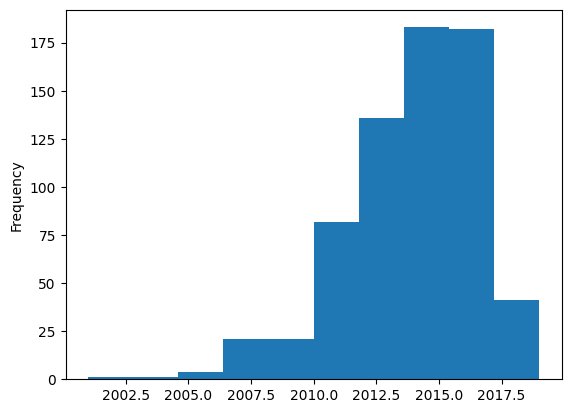

In [8]:
df3["Year"].plot(kind="hist")

<Axes: ylabel='Frequency'>

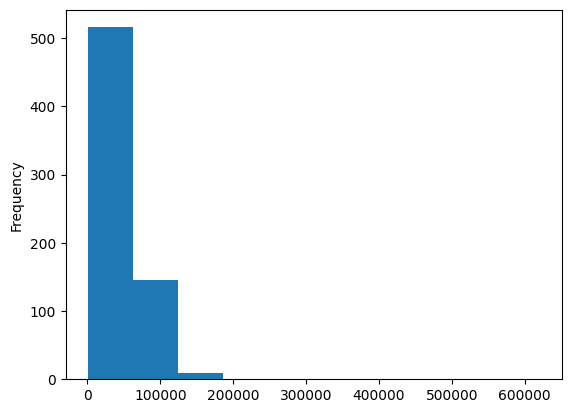

In [9]:
df3["Kilometers_Driven"].plot(kind="hist")

<Axes: ylabel='Frequency'>

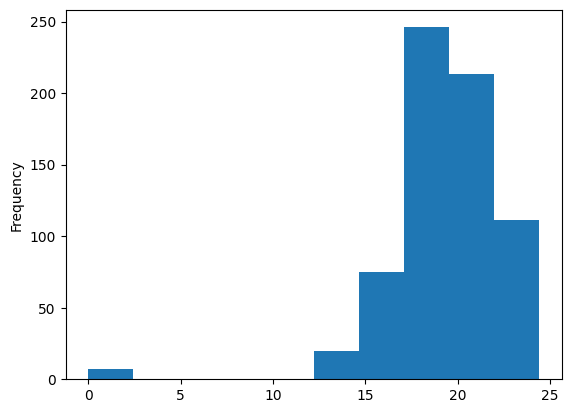

In [10]:
df3["Mileage"].plot(kind="hist")

### Removing Outliers

In [11]:
df4 = df3[df3["Year"] > 2010]
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2,5.0,NaN,12.50
41,Hyundai i20 Magna Optional 1.2,Kochi,2014,35487,Petrol,Manual,First,18.5,1197 CC,82.9,5.0,NaN,4.74
46,Hyundai Xcent 1.1 CRDi S,Jaipur,2014,75000,Diesel,Manual,First,24.4,1120 CC,71.0,5.0,NaN,3.85
52,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,Third,18.9,1197 CC,82.0,5.0,NaN,3.60
84,Hyundai Grand i10 Sportz,Bangalore,2016,16000,Petrol,Manual,First,18.9,1197 CC,82.0,5.0,NaN,5.75


In [12]:
df5 = df4[df4["Kilometers_Driven"] < 120000]
print(df5.shape)
df5.head()

(577, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2,5.0,NaN,12.50
41,Hyundai i20 Magna Optional 1.2,Kochi,2014,35487,Petrol,Manual,First,18.5,1197 CC,82.9,5.0,NaN,4.74
46,Hyundai Xcent 1.1 CRDi S,Jaipur,2014,75000,Diesel,Manual,First,24.4,1120 CC,71.0,5.0,NaN,3.85
52,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,Third,18.9,1197 CC,82.0,5.0,NaN,3.60
84,Hyundai Grand i10 Sportz,Bangalore,2016,16000,Petrol,Manual,First,18.9,1197 CC,82.0,5.0,NaN,5.75


In [13]:
df6 = df5[df5["Mileage"] > 12]
print(df6.shape)
df6.head()

(575, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2,5.0,NaN,12.50
41,Hyundai i20 Magna Optional 1.2,Kochi,2014,35487,Petrol,Manual,First,18.5,1197 CC,82.9,5.0,NaN,4.74
46,Hyundai Xcent 1.1 CRDi S,Jaipur,2014,75000,Diesel,Manual,First,24.4,1120 CC,71.0,5.0,NaN,3.85
52,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,Third,18.9,1197 CC,82.0,5.0,NaN,3.60
84,Hyundai Grand i10 Sportz,Bangalore,2016,16000,Petrol,Manual,First,18.9,1197 CC,82.0,5.0,NaN,5.75


## Modelling

### Data Preparation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
# Cars with the same name have the same HorsePower so the Power Column is redundant
df6.drop(columns=["Seats", "Engine", "New_Price", "Power"], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8984\692649899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(columns=["Seats", "Engine", "New_Price", "Power"], inplace=True)


In [16]:
X = df6.drop(columns=["Price"])
y = df6["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Evaluation

In [17]:
y_train_pred_baseline = [y_train.mean()] * len(y_train)
base_training_mae = mean_absolute_error(y_train_pred_baseline, y_train)
print("Baseline MAE on Training Set: ",base_training_mae)

Baseline MAE on Training Set:  2.1688054820415874


In [18]:
categorical_cols = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type"]

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')

model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

In [19]:
model_training_mae = mean_absolute_error(y_train_pred, y_train)
print("Model MAE on In-House Predictions: ",model_training_mae)

Model MAE on In-House Predictions:  0.4798102767131315


<Axes: ylabel='Frequency'>

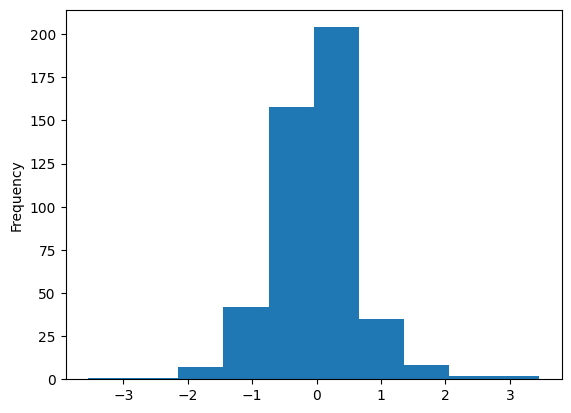

In [20]:
resid = y_train - y_train_pred 
resid.plot(kind="hist")

In [23]:
y_test_pred_baseline = [y_test.mean()] * len(y_test)
base_test_mae = mean_absolute_error(y_test_pred_baseline, y_test)
print("Baseline MAE on Test Set: ",base_test_mae)

Baseline MAE on Test Set:  2.194038563327032


In [24]:
y_test_pred = model.predict(X_test)

model_test_mae = mean_absolute_error(y_test_pred, y_test)
print("Model MAE on Out of Sample Data: ",model_test_mae)

Model MAE on Out of Sample Data:  0.5711901991965184


### Iterate

In [26]:
df7 = df6.drop(columns=["Location"])

In [27]:
X2 = df7.drop(columns=["Price"])
y2 = df7["Price"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [28]:
categorical_cols = ["Name", "Fuel_Type", "Transmission", "Owner_Type"]

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')

model2 = make_pipeline(preprocessor, LinearRegression())
model2.fit(X_train2, y_train2)

y_train_pred2 = model2.predict(X_train2)

model_training_mae2 = mean_absolute_error(y_train_pred2, y_train2)
print("Model(Without Location Column) MAE on In-House Predictions: ",model_training_mae2)

Model(Without Location Column) MAE on In-House Predictions:  0.6590619667930925


<Axes: ylabel='Frequency'>

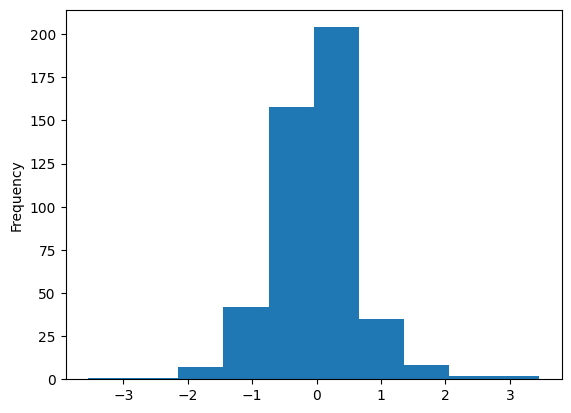

In [29]:
resid2 = y_train2 - y_train_pred2 
resid.plot(kind="hist")

In [30]:
y_test_pred2 = model2.predict(X_test2)

model_test_mae2 = mean_absolute_error(y_test_pred2, y_test2)
print("Model(Without Location Column) MAE on Out of Sample Data: ",model_test_mae2)

Model(Without Location Column) MAE on Out of Sample Data:  0.7768089619640479


In [31]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [154]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage
802,Hyundai i20 Asta Option 1.2,Kochi,2017,58620,Petrol,Manual,First,18.60
2411,Hyundai Verna 1.6 SX VTVT,Mumbai,2014,11000,Petrol,Manual,First,17.01
779,Hyundai Verna 1.6 SX VTVT,Hyderabad,2014,67000,Petrol,Manual,First,17.01
4441,Hyundai Creta 1.6 CRDi SX Option,Bangalore,2016,51000,Diesel,Manual,First,19.67
750,Hyundai i10 Sportz AT,Coimbatore,2014,41016,Petrol,Automatic,Second,16.95


In [40]:
def make_prediction(year, kms_driven, mile, name, loc, fuel, trans, owners):
    df = pd.DataFrame({"Name": name,
                        "Location": loc,
                        "Year": year,
                        "Kilometers_Driven": kms_driven,
                        "Fuel_Type": fuel,
                        "Transmission": trans,
                        "Owner_Type": owners,
                        "Mileage": mile
                        }, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted car price: ₹{prediction}(${round(prediction * 1167.49, 2)})"

In [43]:
interact(
    make_prediction,
    year=IntSlider(
        min=X_train["Year"].min(),
        max=X_train["Year"].max(),
        value=X_train["Year"].mean(),
    ),
    kms_driven=FloatSlider(
        min=X_train["Kilometers_Driven"].min(),
        max=X_train["Kilometers_Driven"].max(),
        step=0.01,
        value=X_train["Kilometers_Driven"].mean(),
    ),
    mile=FloatSlider(
        min=X_train["Mileage"].min(),
        max=X_train["Mileage"].max(),
        step=0.01,
        value=X_train["Mileage"].mean(),
    ),
    name=Dropdown(options=sorted(X_train["Name"].unique())
    ),
    loc=Dropdown(options=sorted(X_train["Location"].unique())
    ),
    fuel=Dropdown(options=sorted(X_train["Fuel_Type"].unique())
    ),
    trans=Dropdown(options=sorted(X_train["Transmission"].unique())
    ),
    owners=Dropdown(options=sorted(X_train["Owner_Type"].unique())),
);

interactive(children=(IntSlider(value=2014, description='year', max=2019, min=2011), FloatSlider(value=43816.1…